In [1]:
from arcgishub.hub import Hub
from arcgis import GIS

In [2]:
myhub = Hub("https://dcdev.maps.arcgis.com/", "mmajumdar_dcdev", "password")

In [3]:
newHub = Hub("https://cityx.maps.arcgis.com", "cityofx_admin", "password")

In [3]:
i = myhub.initiatives.get('0acd2f0e284543279d49d9f88d6e5f7e')

In [4]:
i1 = myhub.initiatives.clone(i)
i1

KeyError: 'siteId'

In [9]:
i.item.get_data()

{'assets': [{'id': 'bannerImage',
   'url': 'https://dcdev.maps.arcgis.com/sharing/rest/content/items/0acd2f0e284543279d49d9f88d6e5f7e/resources/detail-image.jpg',
   'properties': {'type': 'resource',
    'fileName': 'detail-image.jpg',
    'mimeType': 'image/jepg'},
   'license': {'type': 'none'},
   'display': {'position': {'x': 'center', 'y': 'center'}}},
  {'id': 'iconDark',
   'url': 'https://dcdev.maps.arcgis.com/sharing/rest/content/items/0acd2f0e284543279d49d9f88d6e5f7e/resources/icon-dark.png',
   'properties': {'type': 'resource',
    'fileName': 'icon-dark.png',
    'mimeType': 'image/png'},
   'license': {'type': 'none'}},
  {'id': 'iconLight',
   'url': 'https://dcdev.maps.arcgis.com/sharing/rest/content/items/0acd2f0e284543279d49d9f88d6e5f7e/resources/icon-light.png',
   'properties': {'type': 'resource',
    'fileName': 'icon-light.png',
    'mimeType': 'image/png'},
   'license': {'type': 'none'}}],
 'steps': [{'id': 'informTools',
   'title': 'Inform the Public',
   '

### Creating initiative with site

In [12]:
initiative1 = myhub.initiatives.add(title='in-site')
initiative1.item

<Item title:"in-site" type:Hub Initiative owner:mmajumdar_dcdev>

In [ ]:
s = myhub.sites.get('ce95fd5bc0714a4bb13e9fe5f9339778')
s.delete()

In [54]:
initiative1.definition['steps'][0]['itemIds'][0]

'78d993c018684ac69904f71ed029db8e'

In [3]:
s1 = myhub.sites.get('78d993c018684ac69904f71ed029db8e')

c:\users\manu9321\src\arcgishub\arcgishub\_store\od-sites-data.json


In [56]:
s1.item.typeKeywords

['Hub',
 'hubSite',
 'hubSolution',
 'JavaScript',
 'Map',
 'Mapping Site',
 'Online Map',
 'OpenData',
 'Ready To Use',
 'selfConfigured',
 'Web Map',
 'Registered App']

### Creating open data site

In [ ]:
title = 'python Open Data site'
myhub.sites.add(title=title, domain=title, group_id='ad321eb4f9ee4b479cc284fcac9af3e4')

### Searching for sites

In [ ]:
site = myhub.sites.search(title=title, owner='mmajumdar_dcdev')[0]
site.item

In [ ]:
site.definition

### Fetching a site

In [ ]:
s = myhub.sites.get('4f35486deef34f36b84ec857951f7d4a')

In [ ]:
s.url[8:]

### Update and Delete a site

In [ ]:
s_del = myhub.sites.add(title='Delete me', domain='delete-me3', group_id='ad321eb4f9ee4b479cc284fcac9af3e4')
s_del

In [ ]:
print(s_del.description)

In [ ]:
s_del.update(site_properties={'description': 'Testing site update'})

In [ ]:
print(s_del.description)

In [ ]:
s_del.itemid

In [ ]:
s_del.delete()

### Verify deletion

In [ ]:
myhub.sites.get(s_del.itemid)

### Copy a site

<Item title:"Manushi test" type:Hub Site Application owner:mmajumdar_dcdev>
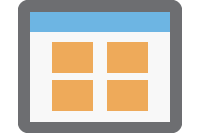

In [13]:
s = myhub.sites.get('38fe239fb959490ea594a4b886904482')
s.item

In [14]:
s2 = myhub.sites.clone(s)
s2.item

<Item title:"Manushi test - Copy e7a520" type:Hub Site Application owner:mmajumdar_dcdev>

### Clone site to another AGOL org

In [15]:
newHub = Hub("https://cityx.maps.arcgis.com", "cityofx_admin", "password")

In [19]:
s_clone = newHub.sites.clone(s)
s_clone.item

<Item title:"Manushi test - Copy 3f9b20" type:Hub Site Application owner:cityofx_admin>

In [30]:
s_clone.delete()

In [23]:
from arcgis.gis import GIS
gis = GIS("https://cityx.maps.arcgis.com", "cityofx_admin", "password")

## Testing Enterprise Sites

In [3]:
eHub = Hub("http://dev0004025.esri.com/portal", "admin", "password")
egis = GIS("http://dev0004025.esri.com/portal", "admin", "password")

In [8]:
g = egis.groups.get('4b1ba60570354a4982871ab33bd4fdef')

### Add Enterprise site

In [9]:
title = 'Manushi test site3'
esite = eHub.sites.add(title=title, subdomain=title, groups=[g])
esite.item

<Item title:"Manushi test site3" type:Site Application owner:admin>

### Update Enterprise site

In [10]:
print(esite.description)

None


In [11]:
esite.update(site_properties={'description': 'Testing enterprise-site update'})

True

In [12]:
print(esite.description)

Testing enterprise-site update


### Deleting site

In [13]:
esite.delete()

True

### Fetching site

In [4]:
s = eHub.sites.get('43506a6d94af425a9d3d2653c7963b2d')

In [5]:
s.item

<Item title:"Manushi-test" type:Site Application owner:admin>

### Cloning from enterprise to AGOL

In [6]:
agol_s = myhub.sites.clone(s)
agol_s.item

<Item title:"Manushi-test-copy-1562783882410" type:Hub Site Application owner:mmajumdar_dcdev>

### Cloning from AGOL to Enterprise

<Item title:"Manushi test" type:Hub Site Application owner:mmajumdar_dcdev>
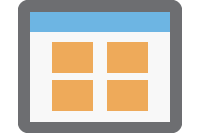

In [17]:
site = myhub.sites.get('38fe239fb959490ea594a4b886904482')
site.item

In [18]:
e_site = eHub.sites.clone(site)
e_site.item

<Item title:"Manushi test-_copy_1562353869766" type:Site Application owner:admin>